In [242]:
# imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.modeling import modeling_functions as mf

In [119]:
codes = pd.read_csv('../EXTR_LookUp.csv')

In [3]:
df = pd.read_csv('../leana_m1')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances,bathtotcount
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,0,N,N,0.0,0,0,0,N,2.75
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0,0,N,N,0.0,0,1,0,N,4.50
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,0,0,N,N,0.0,0,1,0,N,1.75
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,0,N,N,0.0,0,1,0,N,1.75
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0,0,N,N,0.0,0,0,0,N,2.50


# Model 2 Iteration

In this notebook, I continue to iterate from my first model.  In the first model, I found that `squarefeettotliving` and `bathtotcount` had the highest R^2 and met the assumtions best so I will first run from this model.  

First, I'm going to see if standardising all 3 variables with their z-score will imporve the model:

In [4]:
df['saleprice'].mean()

733626.5002751788

In [5]:
def z_score(df, lst_of_features):
    """
    Creates new columns of the list of features in the df with their corresponding z-score.
    """
    for feature in lst_of_features:
        z_feature = 'z_'+feature
        df[z_feature] = (df['feature'] - df['feature'].mean()) / df['feature'].std()
        
    return df

In [7]:
features = ['saleprice', 'squarefeettotalliving', 'bathtotcount']

# z_score(df, features)

# create z-score of sale price
df['z_saleprice'] = (df['saleprice'] - df['saleprice'].mean()) / df['saleprice'].std()

# create z-score of squarefootage
df['z_totsqft'] = (df['squarefeettotalliving'] - df['squarefeettotalliving'].mean()) / df['squarefeettotalliving'].std()

# create z-score bathroom
df['z_totbath'] = (df['bathtotcount'] - df['bathtotcount'].mean()) / df['bathtotcount'].std()

In [8]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances,bathtotcount,z_saleprice,z_totsqft,z_totbath
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,N,0.0,0,0,0,N,2.75,0.898786,0.764912,0.810375
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,N,0.0,0,1,0,N,4.50,0.424133,1.334690,3.203937
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,N,0.0,0,1,0,N,1.75,-0.253944,-0.721468,-0.557375
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,N,0.0,0,1,0,N,1.75,-0.240382,-0.040211,-0.557375
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,N,0.0,0,0,0,N,2.50,0.470242,0.219906,0.468437


### Model z-score features:

In [9]:
# Create a dataframe with only the target and the chosen corellation feature
df_model4 = df[["z_saleprice", "z_totsqft", "z_totbath"]]

# build the R-style formula.
formula = "z_saleprice ~ z_totsqft + z_totbath"

# Fit the model on the dataframe composed of the two features
model4 = ols(formula=formula, data=df_model4).fit()

# view r^2 and model summary:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            z_saleprice   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     5038.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:34:13   Log-Likelihood:                -21773.
No. Observations:               18170   AIC:                         4.355e+04
Df Residuals:                   18167   BIC:                         4.358e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.336e-16      0.006   2.24e-14      1.000      -0.012       0.012
z_totsqft      0.5664      0.009     63.461      0.000       0.549       0.584
z_totbath      0.0406      0.009      4.543      0.000       0.023       0.058
==============================================================================
Omnibus:                     3790.954   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9606.041
Skew:                           1.144   Prob(JB):                         0.00
Kurtosis:                       5.730   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

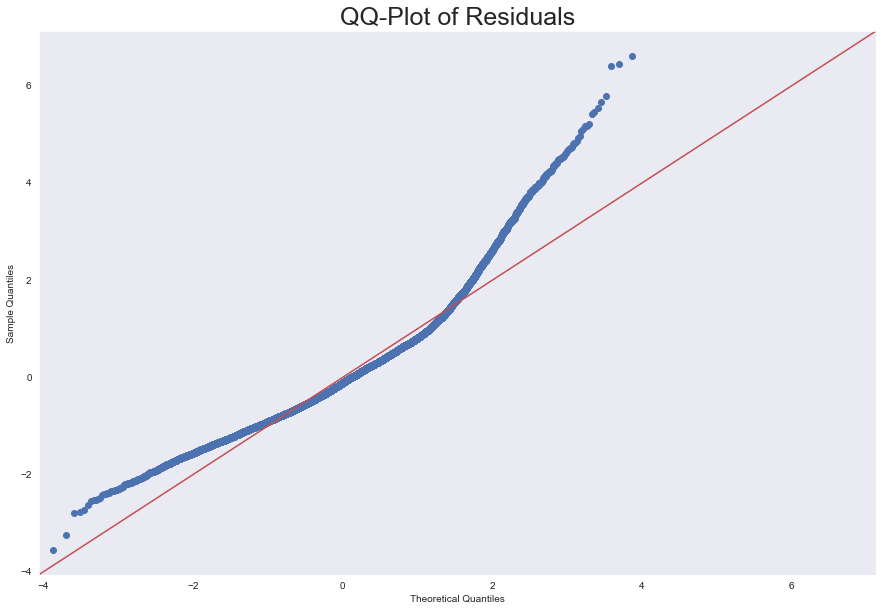

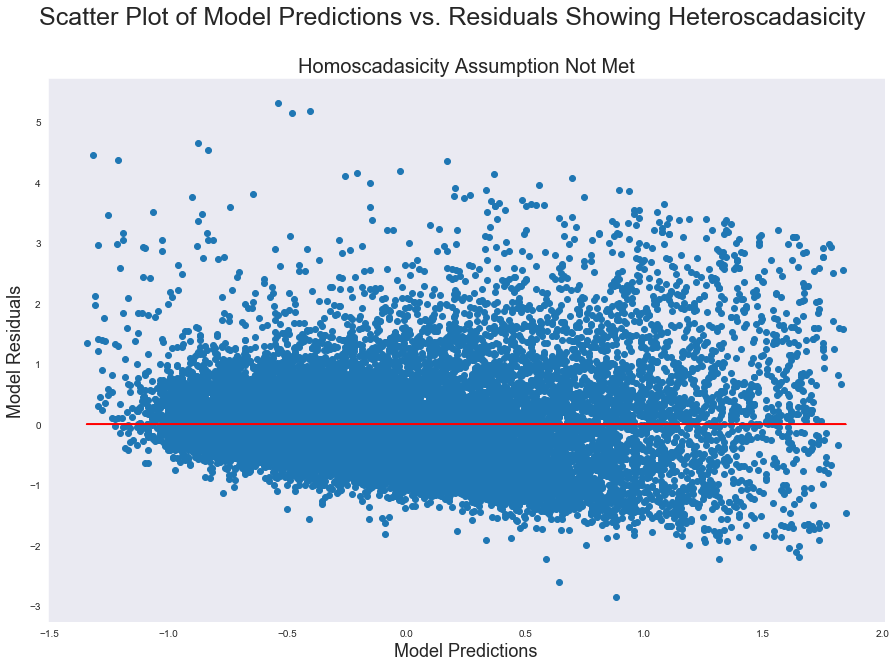

In [10]:
# plot normality assumption
fig, ax = plt.subplots(figsize = (15, 10))
figure = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True, ax = ax);
ax.set_title('QQ-Plot of Residuals', fontsize = 25)

# plot homoscadasicity assumption
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(model4.predict(), model4.resid)
sns.set(font_scale = 1)
fig.suptitle('Scatter Plot of Model Predictions vs. Residuals Showing Heteroscadasicity', fontsize = 25)
ax.set_title('Homoscadasicity Assumption Not Met', fontsize = 20)
plt.xlabel('Model Predictions', fontsize = 18)
plt.ylabel('Model Residuals', fontsize = 18)
ax.tick_params(labelsize=10)
plt.plot(model4.predict(), [0 for i in range(len(df))], color = 'red')

Same results which is to be expected since z-scores just move the data around.

First I'm going to make a funciton for the modeling process:

### Modelling functions:

In [228]:
def model(lst_of_features, df, target_var):
    """
    lst_of_features is a list of strings of the features to use from the df
    df is the data frame to subset the features from 
    target_var is a string of the target variable
    """

    # Create a dataframe with only the target and the chosen corellation feature
    df_model = df[lst_of_features]

    # build the R-style formula.
    target = target_var
    copy_lst_features = lst_of_features.copy()
    copy_lst_features.remove(target)
    x_vals = copy_lst_features
    x_formula = '+'.join(x_vals)
    formula = target + '~' + x_formula

    # Fit the model on the dataframe composed of the two features
    model = ols(formula=formula, data=df_model).fit()
    
    rsquared = model.rsquared
    params = model.params
    
    print(f'Rsquared of Model: {rsquared}')
    print('----------')
    print('Beta values of Model:')
    print(params)
    
    print(model.summary())
    # view r^2 and model summary:
    return model

In [19]:
def normality_assumption(model):
    # plot normality assumption
    fig, ax = plt.subplots(figsize = (15, 10))
    figure = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax = ax);
    ax.set_title('QQ-Plot of Residuals', fontsize = 25)
    return plt.show()

In [20]:
def homo_assumption(model):
    # plot homoscadasicity assumption
    fig, ax = plt.subplots(figsize = (15, 10))
    plt.scatter(model.predict(), model.resid)
    sns.set(font_scale = 1)
    fig.suptitle('Scatter Plot of Model Predictions vs. Residuals', fontsize = 25)
    # ax.set_title('Homoscadasicity Assumption Not Met', fontsize = 20) - change this to an iff statement maybe...
    plt.xlabel('Model Predictions', fontsize = 18)
    plt.ylabel('Model Residuals', fontsize = 18)
    ax.tick_params(labelsize=10)
    plt.plot(model.predict(), [0 for i in range(len(df))], color = 'red')
    return plt.show()

# Model 3 Iteration

Team member Luluva made progress with a model using `'saleprice ~ sqft_ctr + baths_ctr + tot_basement_ctr + deck_ctr + porch_ctr'` where she centralised the independent features.  I'm going to work with these features in their original form and experiment with different transformations as well as adding other features.

In [23]:
df.columns

Index(['documentdate', 'saleprice', 'propertytype', 'principaluse',
       'saleinstrument', 'currentuseland', 'historicproperty', 'salereason',
       'propertyclass', 'zipcode', 'streettype', 'stories', 'buildinggrade',
       'squarefeettotalliving', 'squarefeettotalbasement',
       'squarefeetgarageattached', 'squarefeetopenporch',
       'squarefeetenclosedporch', 'squarefeetdeck', 'bedrooms',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount',
       'fireplacesinglestory', 'fireplacemultiplestory',
       'fireplacefreestanding', 'fireplaceadditional', 'yearbuilt',
       'yearrenovated', 'percentcomplete', 'obsolescence',
       'percentnetcondition', 'condition', 'township', 'propertytype.1',
       'districtname', 'levycode', 'lotsquarefootage', 'watersystem', 'access',
       'topography', 'viewmtranier', 'viewolympics', 'viewcascades',
       'viewterritorial', 'viewseattleskyline', 'viewpugetsound',
       'viewlakewashington', 'viewlakesammamish', 'viewsmalllakeriv

First I need to create a `sqftporch` feature that includes the total square footage of the porch features:

In [24]:
df['sqftporch'] = df['squarefeetopenporch'] + df['squarefeetenclosedporch']

In [57]:
# create list of features to get the existing model:
features = ['saleprice', 'squarefeettotalliving', 'bathtotcount', 'squarefeetdeck', 'sqftporch', 'squarefeettotalbasement']

In [61]:
# create model:
model3 = model(features, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     2148.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:41:57   Log-Likelihood:            -2.5446e+05
No. Observations:               18170   AIC:                         5.089e+05
Df Residuals:                   18164   BIC:                         5.090e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

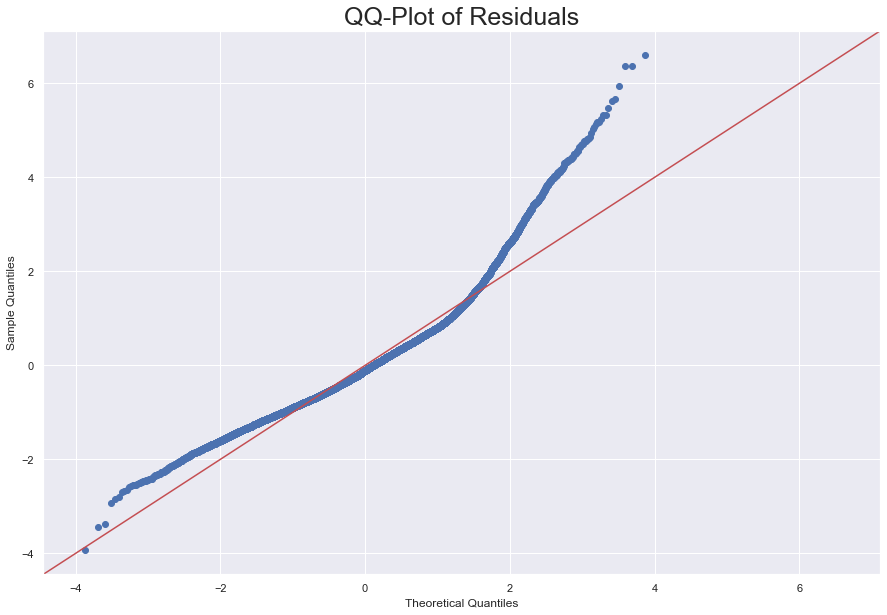

In [62]:
normality_assumption(model3)

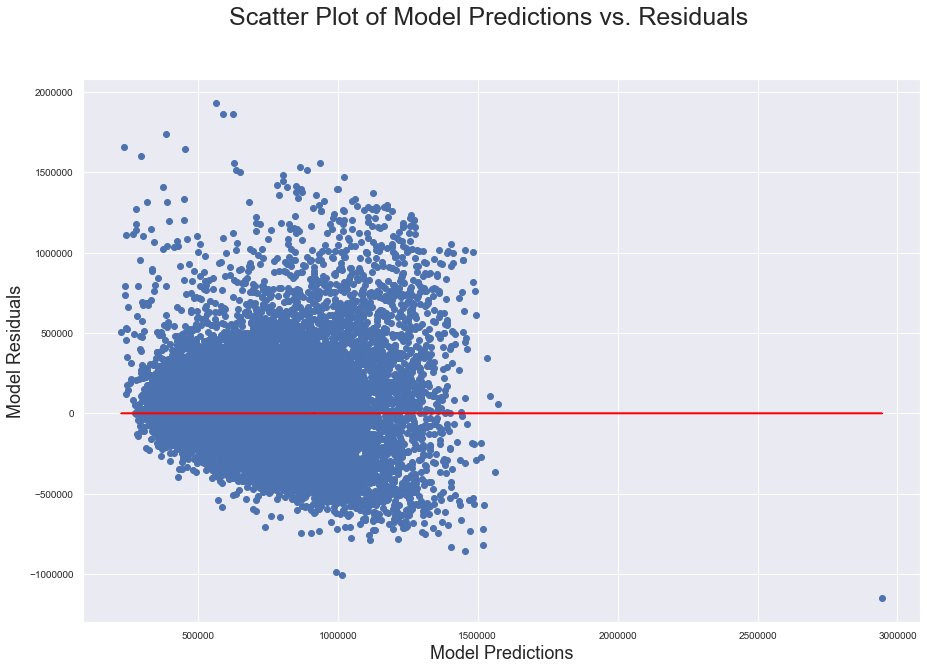

In [63]:
homo_assumption(model3)

R^2 has imporved and the assumptions also look like they have imporved.  

I am a little concerned that the basement squarefootage has already been counted in the total living square footage (since this is how real estate agents count total living square footage).  So instead, I want to create a new column that simply specifies whether a house has or does not have a basement.  This will be a categorical, binary variable.

# Model 4 Iteration

In this iteration, I take our basement square footage and replace it with the binary variable 'has' vs. 'does not have'.

In [70]:
# experiment with how to extract this information:
# see if there are any nan's
df['squarefeettotalbasement'].isna().sum()

0

In [71]:
df['squarefeettotalbasement'].unique()

array([1080, 1590, 1210,    0, 1320, 1100,  690, 1350,  360,  580, 1200,
        460,  620, 1030,  830, 1370,  900,  680, 1180, 1120,  950,  810,
       1480,  670, 1250,  930,  450,  300,  290, 1260, 2120, 1410,  480,
        740,  380, 1490,  880,  960,  710,  540, 1230, 1790, 1170,  500,
       1540,  940,  760, 1620, 1000, 1400,  420, 1110,  430, 1070, 1010,
        860, 1240, 1420,  920,  840,  790, 1800,  200, 1140, 1310,  660,
       1660, 1440, 1330, 1160, 1190,  520,  970,  890, 1360,  240,  700,
       1090,  560,  600,  750,  590, 1510,  490,  510,  640,  720, 1340,
       1280, 1780,  410,  820, 1520,  770, 1220, 1460, 1810, 1470, 1640,
       1130,  140,  850, 1950, 1150,  870, 1300,  530,  390,  980, 1040,
       1750, 2080, 1730,  400,  440,  780,  990, 1270,  910,  550, 1530,
       1060,  650, 1570, 1390,  470, 1430,  800,  320, 1550, 2150, 2500,
       1020,  644, 1760, 1870, 1560,  120,  925, 1860,  130, 1580, 1050,
        340, 1630,  610, 1450,  442,  630, 2030,  2

So, I think it is safe to say that if a basement has '0' sqft there is no basement and visa versa.

In [77]:
df['has_basement'] = np.where(df['squarefeettotalbasement'] > 0, 1, 0)

In [78]:
df['has_basement'].sum()

8660

So 8660 properties have a basement.  Let's see if this has a correlation with `saleprice`.

In [83]:
df_corr = df.corr()
df_corr['saleprice']['has_basement']

0.1663590082672319

Compare this with square feet of basement correlation:

In [84]:
df_corr['saleprice']['squarefeettotalbasement']

0.22491951509323452

It is a lesser correlatioin than total square feet but I wonder if it would improve our model with our other features... 

In [85]:
features4 = ['saleprice', 'has_basement', 'bathtotcount', 'squarefeetdeck', 'sqftporch']

In [86]:
model4 = model(features4, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     1620.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:01:44   Log-Likelihood:            -2.5591e+05
No. Observations:               18170   AIC:                         5.118e+05
Df Residuals:                   18165   BIC:                         5.119e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.878e+05   7549.627     24.

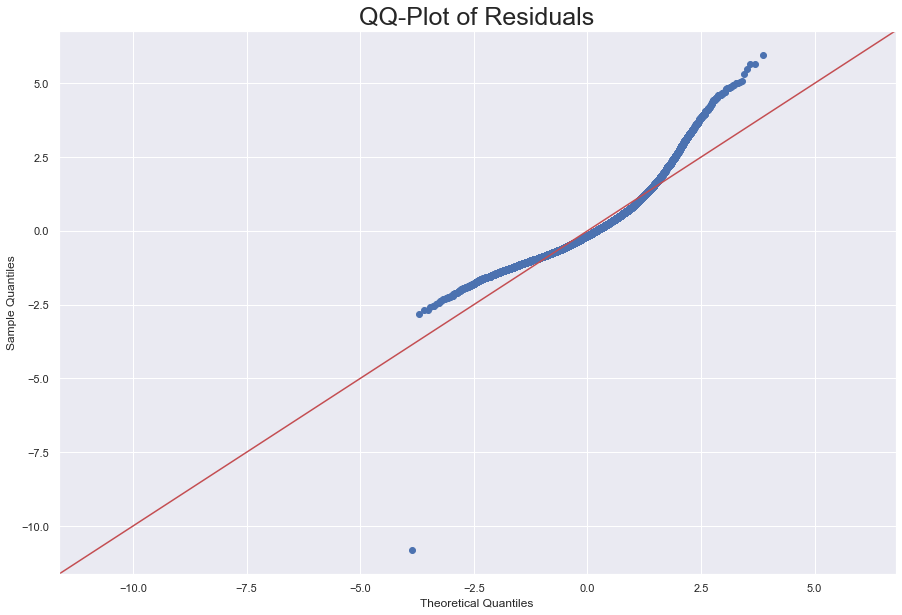

In [87]:
normality_assumption(model4)

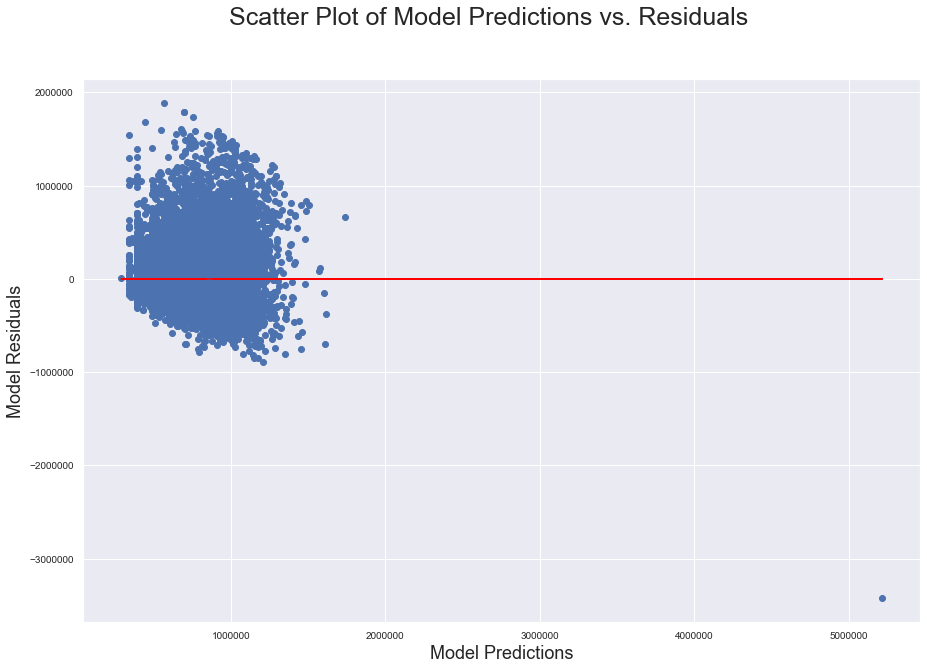

In [89]:
homo_assumption(model4)

This looks terrible, so we can say that having a basement/not having a basement doesn't contribute much to our model...

What if we did the same to deck and porch - look at them as binary variables instead?

# Model 5 Iteration

In [90]:
df['squarefeetdeck'].unique()

array([   0,   90,  410,  260,  310,  140,  117,  110,  320,  100,  730,
        200,  180,  420,  450,  170,  152,  270,  350,  130,  520,  120,
        390,  290,  190,  490,   80,  360,  560,   30,  160,  600,  210,
         60,  630,  440,  300,  380,  990,  561,   50,  400,  280,  340,
        150,  220,  240,  500,  430,  750,  330,  640,  780,  460,  530,
        250, 1240,   40,  700,  470,  940,  375,   66,  660,  230,  550,
        576,  540,  970,  670,  850,  135,  370, 1080,  910,  800, 1380,
        720,  870,  770,  480,  168, 1100,   70,  510,  860,  580,  760,
         48,  131,  584,  132, 1140,  610,  590,  204,  384,  570,  352,
        335,   52,  125,  482,  820, 2180,  880,  840, 1040,   65,  690,
         28,  966,  208,  950,  585,  890, 1030, 1670, 1200,  196,  920,
        740,  224,  144,  221,  680,  790,   20,  432,  192,  900, 1310,
       1090,  980, 1250,  620, 1060,  494, 1050,  650,  830, 1910,  256,
       1020,   96,  252,  489, 1280,  155, 1190,  5

In [91]:
df['sqftporch'].unique()

array([   90,    50,     0,    60,   135,   130,   180,   270,    30,
         290,   150,    40,    80,   199,   100,   140,   320,   120,
          70,   160,   170,    76,   110,   190,   240,   200,   280,
         340,   500,   260,   540,   360,    55,   300,   210,   220,
         250,    96,   310,   330,    20,   273,   230,   192,   370,
         241,   350,   282,   420,   440,    36,   700,   206,   216,
         720,   214,   530,   104,   450,   400,   570,   102,   610,
         436,   510,   142,   780,   396,   203,   470,   228,   390,
         416,    56,   112,   490,   430,   590,   410,   108,   690,
         225,   304,   126,    10,   532,    72,   366,    86,    49,
          88,    25,   380,   810,   215,  1080,    24,   560,    15,
         480,    78,   201,    94,    48,   460,   212,   238,   157,
          95,   630,   213,   242,   323,   362,   520,   217,   740,
         255,   128,    98,   188,    54,   600,    42,    84,   580,
         252,   222,

Create new columns:

In [92]:
df['has_porch'] = np.where(df['sqftporch'] > 0, 1, 0)

In [93]:
df['has_deck'] = np.where(df['squarefeetdeck'] > 0, 1, 0)

Check new correlations:

In [98]:
df_corr = df.corr()
df_corr['saleprice']['has_porch']

0.20358191334725143

In [100]:
df_corr['saleprice']['has_deck']

0.12089217071804217

In [94]:
features5 = ['saleprice', 'has_basement', 'bathtotcount', 'has_porch', 'has_deck']

In [95]:
model5 = model(features5, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1506.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:06:24   Log-Likelihood:            -2.5608e+05
No. Observations:               18170   AIC:                         5.122e+05
Df Residuals:                   18165   BIC:                         5.122e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.65e+05   7744.136     21.305   

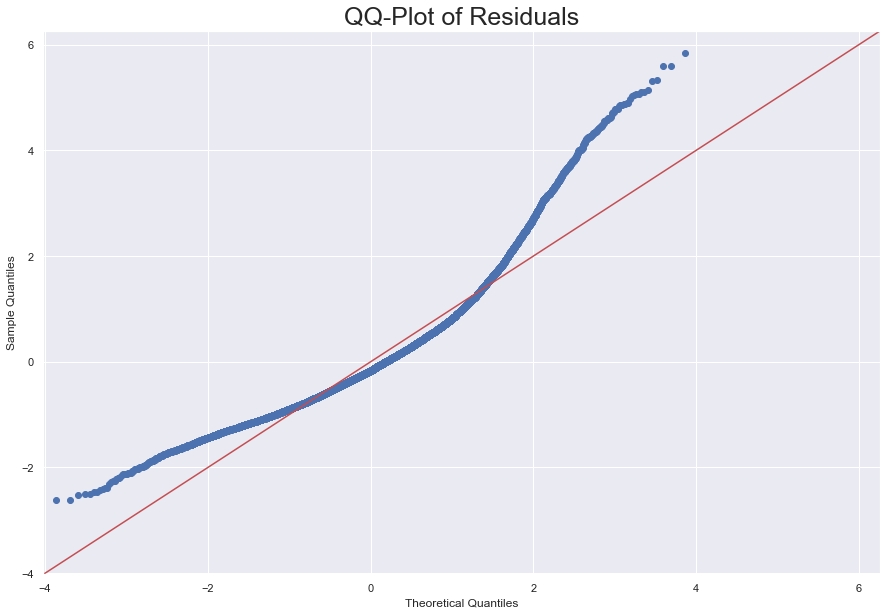

In [101]:
normality_assumption(model5)

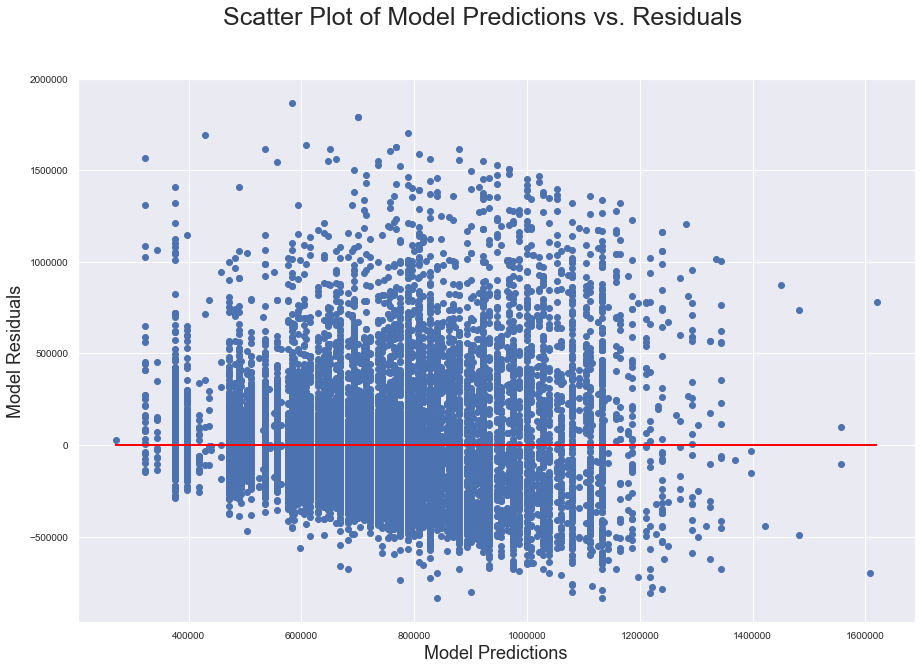

In [102]:
homo_assumption(model5)

The R^2 value is again not great however the assumptions are better than model4.  The homoscadasicity assumption I think has been met the best so far. 

I feel like maybe I'm not dealing with these categorical variables appropriately.  I'm going to try dummy-ing them out. 

# Model 6 Iteration

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18170 entries, 0 to 18169
Data columns (total 72 columns):
documentdate                    18170 non-null object
saleprice                       18170 non-null float64
propertytype                    18170 non-null int64
principaluse                    18170 non-null int64
saleinstrument                  18170 non-null int64
currentuseland                  18170 non-null object
historicproperty                18170 non-null object
salereason                      18170 non-null int64
propertyclass                   18170 non-null int64
zipcode                         15809 non-null float64
streettype                      18170 non-null object
stories                         18170 non-null float64
buildinggrade                   18170 non-null int64
squarefeettotalliving           18170 non-null int64
squarefeettotalbasement         18170 non-null int64
squarefeetgarageattached        18170 non-null float64
squarefeetopenporch            

Let's first change our new columns into category types:

In [105]:
df['has_porch'] = df['has_porch'].astype('category')
df['has_basement'] = df['has_basement'].astype('category')
df['has_deck'] = df['has_deck'].astype('category')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18170 entries, 0 to 18169
Data columns (total 72 columns):
documentdate                    18170 non-null object
saleprice                       18170 non-null float64
propertytype                    18170 non-null int64
principaluse                    18170 non-null int64
saleinstrument                  18170 non-null int64
currentuseland                  18170 non-null object
historicproperty                18170 non-null object
salereason                      18170 non-null int64
propertyclass                   18170 non-null int64
zipcode                         15809 non-null float64
streettype                      18170 non-null object
stories                         18170 non-null float64
buildinggrade                   18170 non-null int64
squarefeettotalliving           18170 non-null int64
squarefeettotalbasement         18170 non-null int64
squarefeetgarageattached        18170 non-null float64
squarefeetopenporch            

Now create dummy variables:

In [108]:
basement_dummies = pd.get_dummies(df['has_basement'], prefix='bsmt', drop_first=True)
porch_dummies = pd.get_dummies(df['has_porch'], prefix='prch', drop_first=True)
deck_dummies = pd.get_dummies(df['has_deck'], prefix='dck', drop_first=True)

In [111]:
# preview:
porch_dummies

,prch_1
0,1
1,1
2,1
3,0
4,0
...,...
18165,1
18166,0
18167,1
18168,1


I'm just realising now that these dummy columns are going to be identical to the columns already in existence so this exersice is pointless.. I'm going to go back and use the original, non-binary variables for my next model... but I'm going to exclude the basement squarefootage:

# Model 7 Iteration

Take out basement square footage

In [112]:
features7 = ['saleprice', 'squarefeettotalliving', 'bathtotcount', 'squarefeetdeck', 'sqftporch']

In [113]:
model7 = model(features7, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     2619.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:22:02   Log-Likelihood:            -2.5454e+05
No. Observations:               18170   AIC:                         5.091e+05
Df Residuals:                   18165   BIC:                         5.091e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.581e+

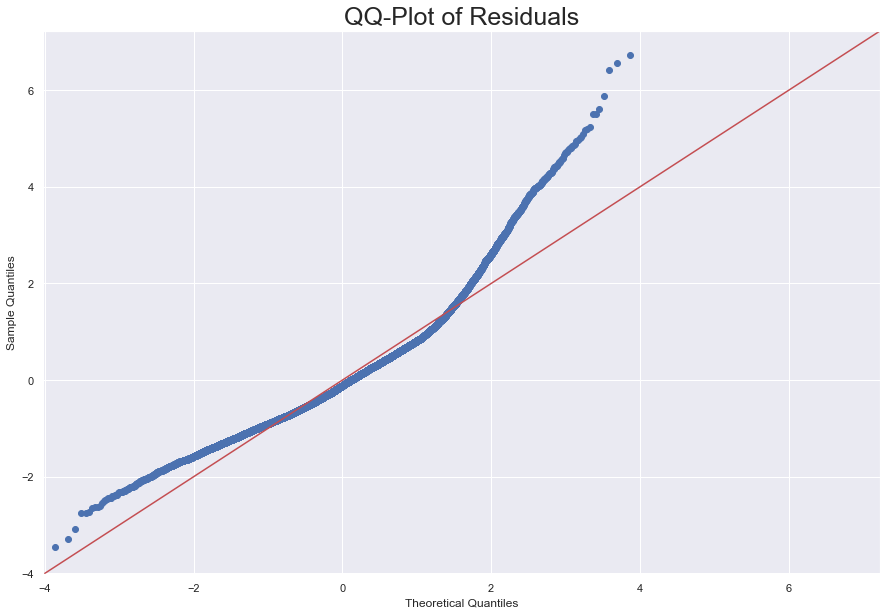

In [114]:
normality_assumption(model7)

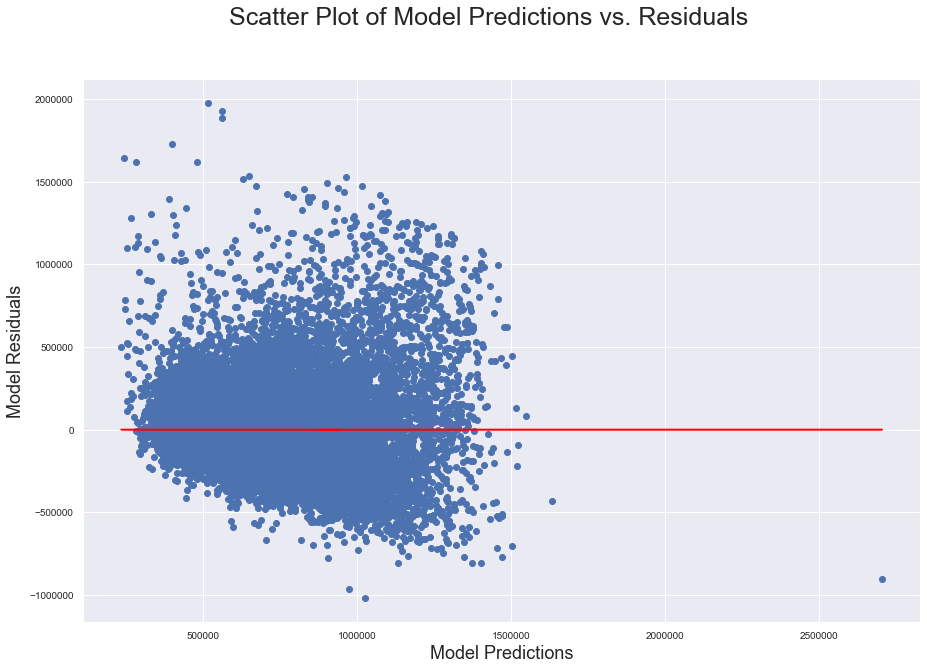

In [115]:
homo_assumption(model7)

Our R^2 is SLIGHTLY lower than when we had basement square footage and our assumptions look much the same... 

Let's see if having a water front property makes a difference...

# Model 8 Iteration

Add waterfront locations:

In [118]:
# investigate waterfront locations:
df['waterfrontlocation'].unique()

array([0, 2, 3, 4])

In [122]:
# look these codes up:

codes[codes['LUType'] == 50]

,LUType,LUItem,LUDescription
964,50,1,DUWAMISH ...
965,50,2,ELLIOTT BAY ...
966,50,3,PUGET SOUND ...
967,50,4,LAKE UNION ...
968,50,5,SHIP CANAL ...
969,50,6,LAKE WASH ...
970,50,7,LAKE SAMM ...
971,50,8,OTHER LAKE ...
972,50,9,RIVER/SLOUGH ...


We see that we only have water front locations of Elliott Bay, Pugest Sount and Lake Union.  There is no value description for '0' so we assume this to mean that the property is not a water front location.

In [123]:
df['waterfrontlocation'].value_counts()

0    18078
2       67
3       21
4        4
Name: waterfrontlocation, dtype: int64

This is telling us that we have 18078 houses without a water front location, 67 on Elliot Bay, 21 on Puget Sound and 4 on Lake Union.

Let's dummy these variables out:

In [125]:
df['waterfrontlocation'] = df['waterfrontlocation'].astype('category')

In [126]:
# create dummies
wtfnt_dummies = pd.get_dummies(df['waterfrontlocation'], prefix='wtfnt', drop_first=True)

In [128]:
# drop existing waterfrontlocation variable to be replaced by dummies
df = df.drop('waterfrontlocation', axis=1)

In [130]:
df = pd.concat([df, wtfnt_dummies], axis=1)

In [131]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,z_saleprice,z_totsqft,z_totbath,sqftporch,has_basement,has_porch,has_deck,wtfnt_2,wtfnt_3,wtfnt_4
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0.898786,0.764912,0.810375,90,1,1,0,0,0,0
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0.424133,1.334690,3.203937,50,1,1,1,0,0,0
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,-0.253944,-0.721468,-0.557375,50,1,1,1,0,0,0
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,-0.240382,-0.040211,-0.557375,0,0,0,1,0,0,0
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0.470242,0.219906,0.468437,0,1,0,1,0,0,0


Now, let's add these variables to our model:

In [229]:
features8 = ['saleprice', 'squarefeettotalliving', 'bathtotcount', 'squarefeetdeck', 'sqftporch', 'wtfnt_2', 'wtfnt_3', 'wtfnt_4']

In [230]:
model8 = model(features8, df, 'saleprice')

Rsquared of Model: 0.3665295945834972
----------
Beta values of Model:
Intercept                158298.535946
squarefeettotalliving       243.401939
bathtotcount              20829.949284
squarefeetdeck              159.366608
sqftporch                   129.310133
wtfnt_2                  142946.284212
wtfnt_3                  137936.360381
wtfnt_4                  235373.657881
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1501.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:44:13   Log-Likelihood:            -2.5453e+05
No. Observations:               18170   AIC:                         5.091e+05
Df Residuals:                   18162   BIC:     

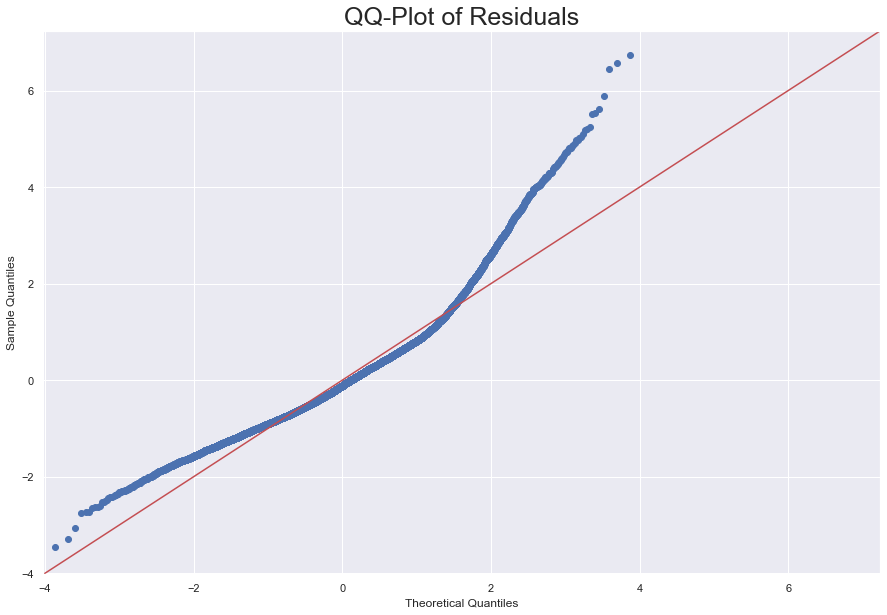

In [134]:
normality_assumption(model8)

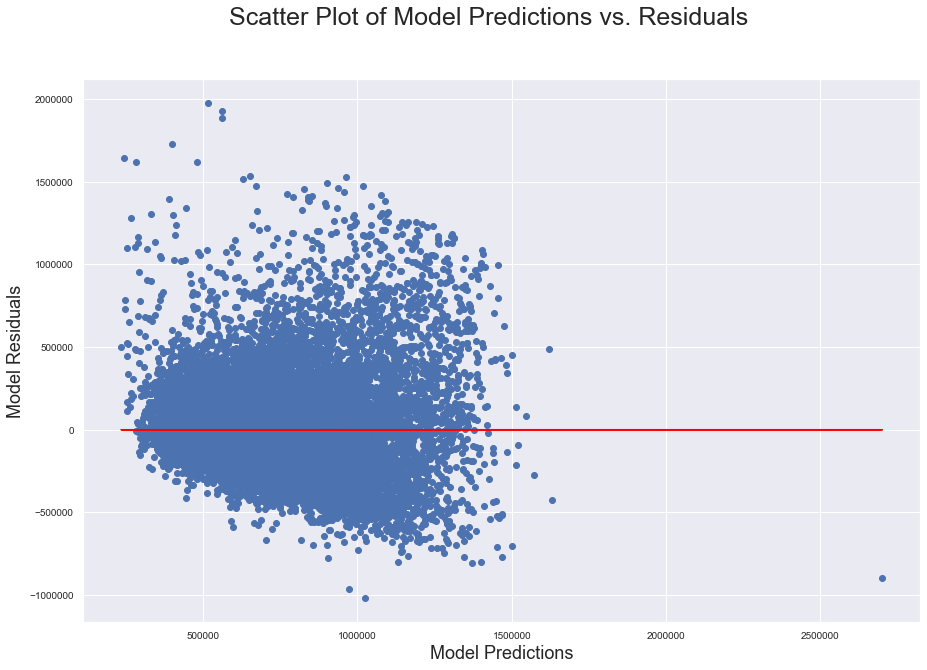

In [135]:
homo_assumption(model8)

Only slightly better r^2 and assumptions much the same.

Next, let's see what happens when we model the z-score of all our features...

# Model 9 Iteration

Model the same features as in model 8 but with z-scores this time.

In [147]:
def z_score(feature, df):
    """
    feaure is a string of the feature you want the z-score of
    df is the dataframe where the feature can be found
    """
    z_name = 'z_' + feature
    df[z_name] = (df[feature] - df[feature].mean()) / df[feature].std()
    
    return df

In [149]:
to_be_z = ['sqftporch', 'wtfnt_2', 'wtfnt_3', 'wtfnt_4']

In [144]:
df.columns

Index(['documentdate', 'saleprice', 'propertytype', 'principaluse',
       'saleinstrument', 'currentuseland', 'historicproperty', 'salereason',
       'propertyclass', 'zipcode', 'streettype', 'stories', 'buildinggrade',
       'squarefeettotalliving', 'squarefeettotalbasement',
       'squarefeetgarageattached', 'squarefeetopenporch',
       'squarefeetenclosedporch', 'squarefeetdeck', 'bedrooms',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount',
       'fireplacesinglestory', 'fireplacemultiplestory',
       'fireplacefreestanding', 'fireplaceadditional', 'yearbuilt',
       'yearrenovated', 'percentcomplete', 'obsolescence',
       'percentnetcondition', 'condition', 'township', 'propertytype.1',
       'districtname', 'levycode', 'lotsquarefootage', 'watersystem', 'access',
       'topography', 'viewmtranier', 'viewolympics', 'viewcascades',
       'viewterritorial', 'viewseattleskyline', 'viewpugetsound',
       'viewlakewashington', 'viewlakesammamish', 'viewsmalllakeriv

In [148]:
z_score('squarefeetdeck', df)

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,z_totsqft,z_totbath,sqftporch,has_basement,has_porch,has_deck,wtfnt_2,wtfnt_3,wtfnt_4,z_squarefeetdeck
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0.764912,0.810375,90,1,1,0,0,0,0,-0.642612
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,1.334690,3.203937,50,1,1,1,0,0,0,-0.199423
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,-0.721468,-0.557375,50,1,1,1,0,0,0,1.376361
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,-0.040211,-0.557375,0,0,0,1,0,0,0,0.637712
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0.219906,0.468437,0,1,0,1,0,0,0,0.883929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18165,2019-07-28,1042800.0,11,6,3,N,N,1,8,NaN,...,1.854923,1.836187,260,1,1,0,0,0,0,-0.642612
18166,2019-11-14,368000.0,14,6,3,N,N,1,8,98042.0,...,-0.411805,0.468437,0,0,0,0,0,0,0,-0.642612
18167,2019-09-09,393000.0,11,6,3,N,N,1,8,98178.0,...,-1.043517,-0.215438,70,0,1,0,0,0,0,-0.642612
18168,2019-12-19,867000.0,11,6,3,N,N,1,8,98199.0,...,-0.362259,-0.557375,60,1,1,1,0,0,0,0.342253


In [150]:
features9 = []
for feature in to_be_z:
    z_score(feature, df)
    features9.append('z_'+feature)    

In [151]:
features9

['z_sqftporch', 'z_wtfnt_2', 'z_wtfnt_3', 'z_wtfnt_4']

In [152]:
features8 = ['saleprice', 'squarefeettotalliving', 'bathtotcount', 'squarefeetdeck', 'sqftporch', 'wtfnt_2', 'wtfnt_3', 'wtfnt_4']

In [154]:
features9.append('z_saleprice')

In [155]:
features9.append('z_totsqft') #, 'z_totbath', 'z_sqarefeetdeck'

In [156]:
features9.append('z_totbath')

In [161]:
features9.append('z_squarefeetdeck')

Yes I know the above could have been done in a for loop - shit got messy for a sec there.

In [162]:
features9.remove('z_sqarefeetdeck')

In [163]:
features9

['z_sqftporch',
 'z_wtfnt_2',
 'z_wtfnt_3',
 'z_wtfnt_4',
 'z_saleprice',
 'z_totsqft',
 'z_totbath',
 'z_squarefeetdeck']

Now create model with these:

In [164]:
model9 = model(features9, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1501.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:54:11   Log-Likelihood:                -21634.
No. Observations:               18170   AIC:                         4.328e+04
Df Residuals:                   18162   BIC:                         4.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.336e-16      0.006  

In [160]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,has_porch,has_deck,wtfnt_2,wtfnt_3,wtfnt_4,z_squarefeetdeck,z_sqftporch,z_wtfnt_2,z_wtfnt_3,z_wtfnt_4
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,1,0,0,0,0,-0.642612,0.129956,-0.060835,-0.034015,-0.014838
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,1,1,0,0,0,-0.199423,-0.154915,-0.060835,-0.034015,-0.014838
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,1,1,0,0,0,1.376361,-0.154915,-0.060835,-0.034015,-0.014838
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,1,0,0,0,0.637712,-0.511004,-0.060835,-0.034015,-0.014838
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0,1,0,0,0,0.883929,-0.511004,-0.060835,-0.034015,-0.014838


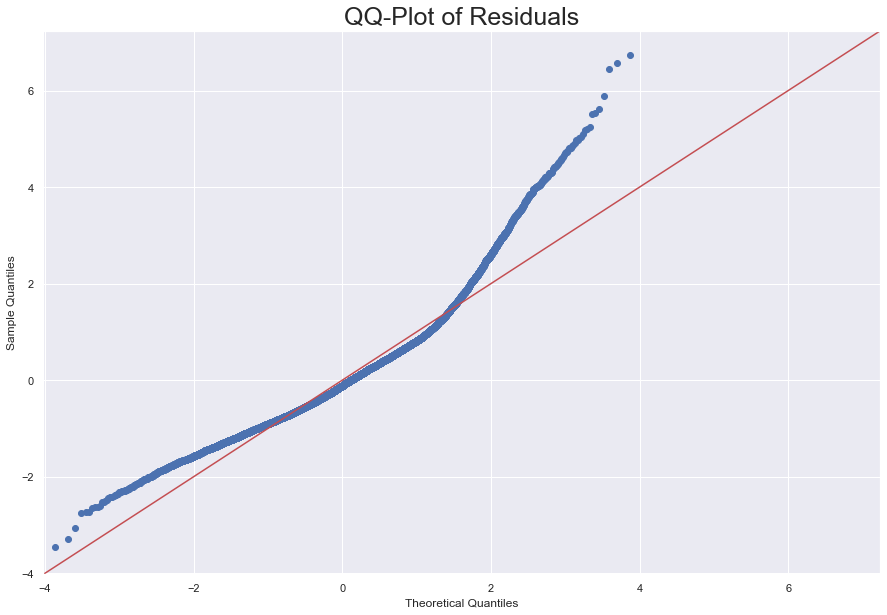

In [165]:
normality_assumption(model9)

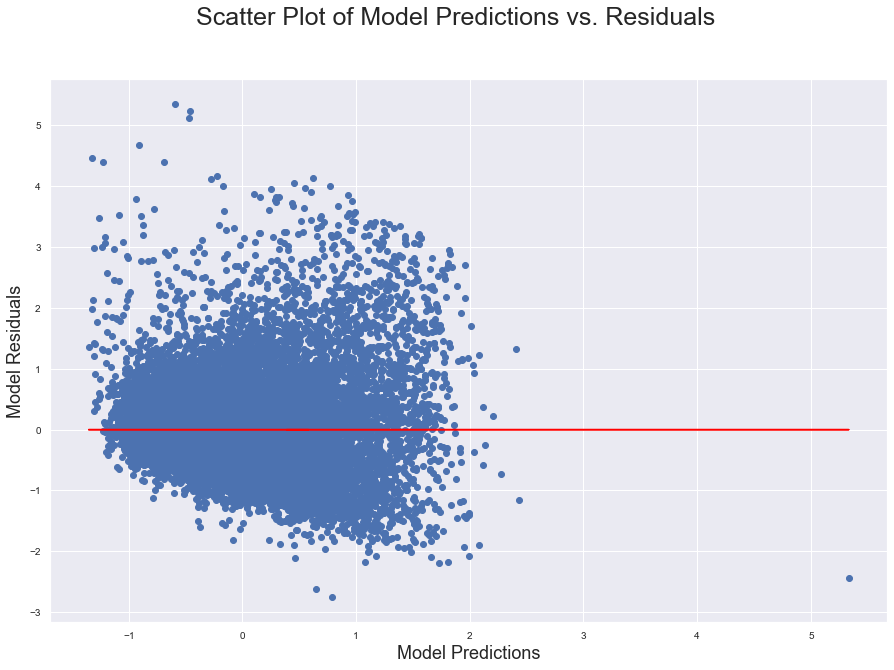

In [166]:
homo_assumption(model9)

As expected, we get exactly the same R^2.

Next, let's try centering all the data like luluva did in her last model:

# Model 10 Iteration

In this iteration, we take the same variables from model 8 and center them all.

In [167]:
def center_features(feature, df):
    """
    feaure is a string of the feature you want the z-score of
    df is the dataframe where the feature can be found
    """
    ctr_name = 'ctr_' + feature
    df[ctr_name] = df[feature] - df[feature].mean()
    
    return df

In [168]:
features8 = ['saleprice', 'squarefeettotalliving', 'bathtotcount', 'squarefeetdeck', 'sqftporch', 'wtfnt_2', 'wtfnt_3', 'wtfnt_4']

In [169]:
features10 = []
for feature in features8:
    center_features(feature, df)
    features10.append('ctr_'+feature)

In [231]:
features10

['ctr_saleprice',
 'ctr_squarefeettotalliving',
 'ctr_bathtotcount',
 'ctr_squarefeetdeck',
 'ctr_sqftporch',
 'ctr_wtfnt_2',
 'ctr_wtfnt_3',
 'ctr_wtfnt_4']

Let's quickly view what our `ctr_saleprice` data looks like - should look the same:

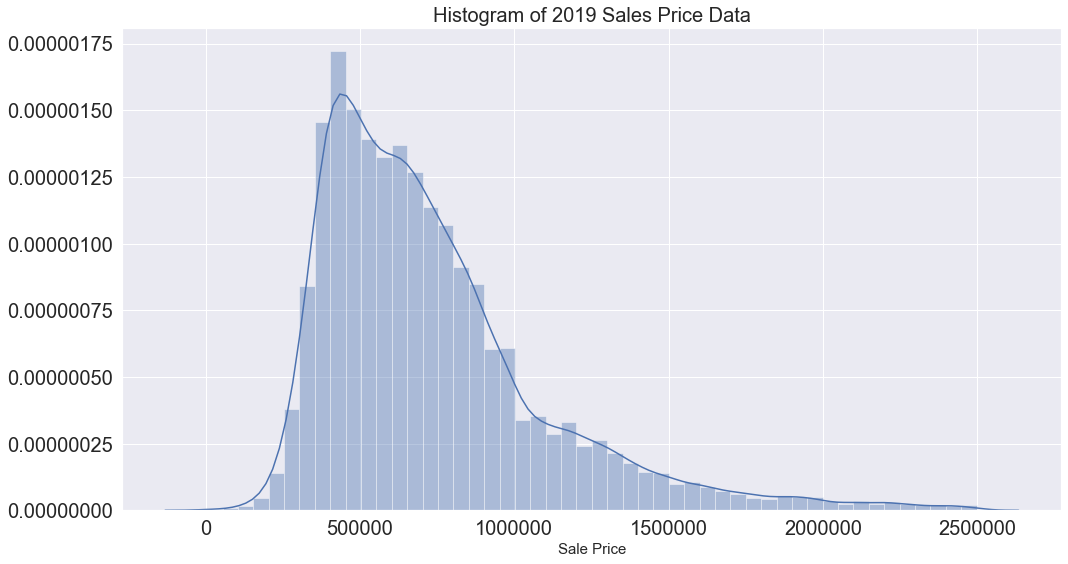

In [174]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Histogram of 2019 Sales Price Data', fontsize = 20)
sns.distplot(df.saleprice, ax = ax, axlabel = "")
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Sale Price', fontsize = 15)
plt.tight_layout()

Model:

In [232]:
model10 = model(features10, df, 'ctr_saleprice')

Rsquared of Model: 0.3665295945834973
----------
Beta values of Model:
Intercept                    1.741682e-10
ctr_squarefeettotalliving    2.434019e+02
ctr_bathtotcount             2.082995e+04
ctr_squarefeetdeck           1.593666e+02
ctr_sqftporch                1.293101e+02
ctr_wtfnt_2                  1.429463e+05
ctr_wtfnt_3                  1.379364e+05
ctr_wtfnt_4                  2.353737e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          ctr_saleprice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1501.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:44:40   Log-Likelihood:            -2.5453e+05
No. Observations:               18170   AIC:                         5.091e+05
Df Residuals:            

Same results...

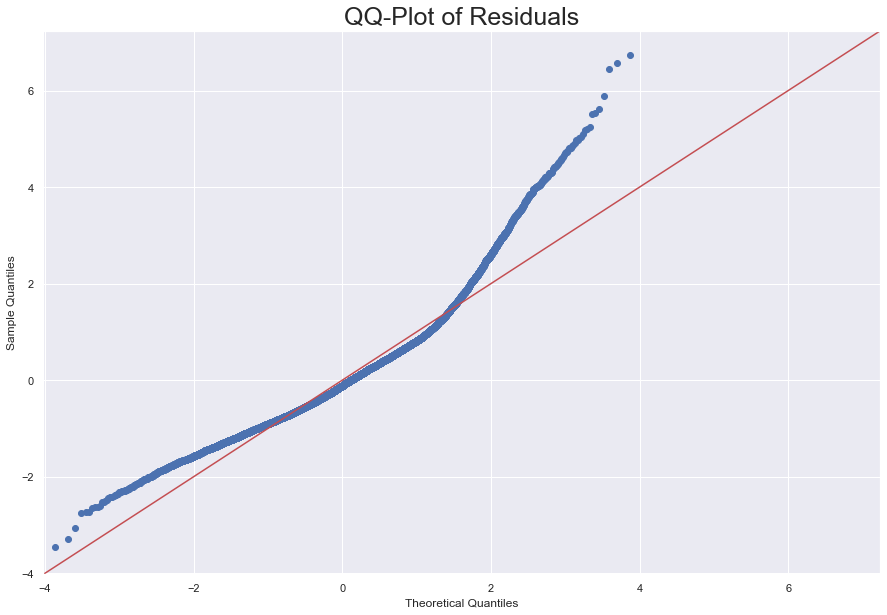

In [179]:
normality_assumption(model10)

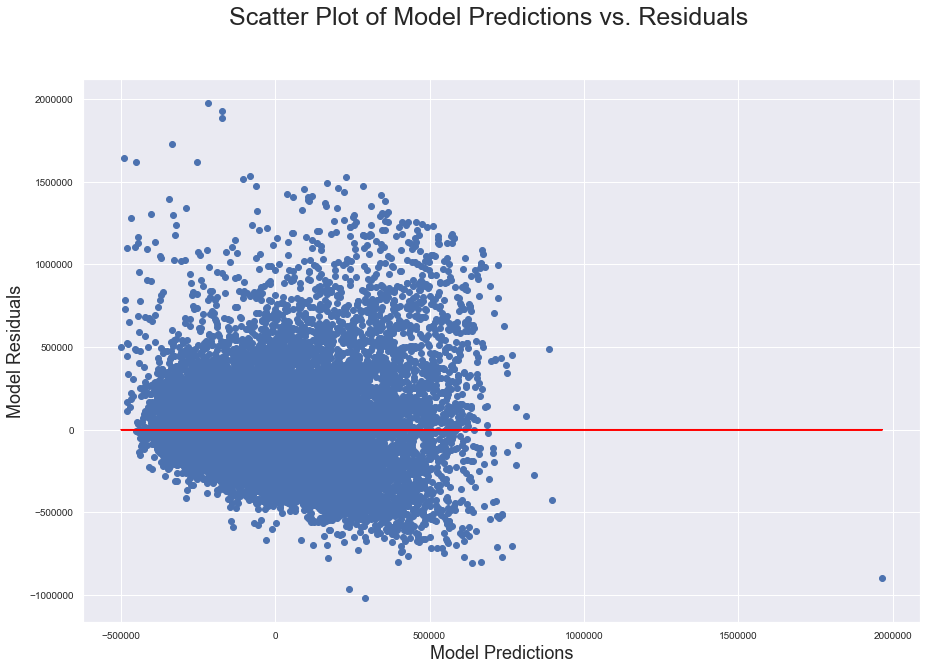

In [180]:
homo_assumption(model10)

Same results.... need to try something new... 

# Summary so far:

Model 8/10 has been the best model so far.  Let's inspect the multicollinearity between all these features:

## Checking Multicollinearity:

In [187]:
features8

['saleprice',
 'squarefeettotalliving',
 'bathtotcount',
 'squarefeetdeck',
 'sqftporch',
 'wtfnt_2',
 'wtfnt_3',
 'wtfnt_4']

In [258]:
x_features = ['ctr_squarefeettotalliving', 'ctr_bathtotcount', 'squarefeettotalbasement', 'squarefeetdeck', 'sqftporch']

In [259]:
df_x_feats = df.loc[:, x_features]

In [260]:
df_x_feats.head()

,ctr_squarefeettotalliving,ctr_bathtotcount,squarefeettotalbasement,squarefeetdeck,sqftporch
0,617.536819,0.592488,1080,0,90
1,1077.536819,2.342488,1590,90,50
2,-582.463181,-0.407512,1210,410,50
3,-32.463181,-0.407512,0,260,0
4,177.536819,0.342488,1320,310,0


In [261]:
x_corrs = df_x_feats.corr()

Text(0.5, 1, 'Heat Map of Feature Multicollinearity')

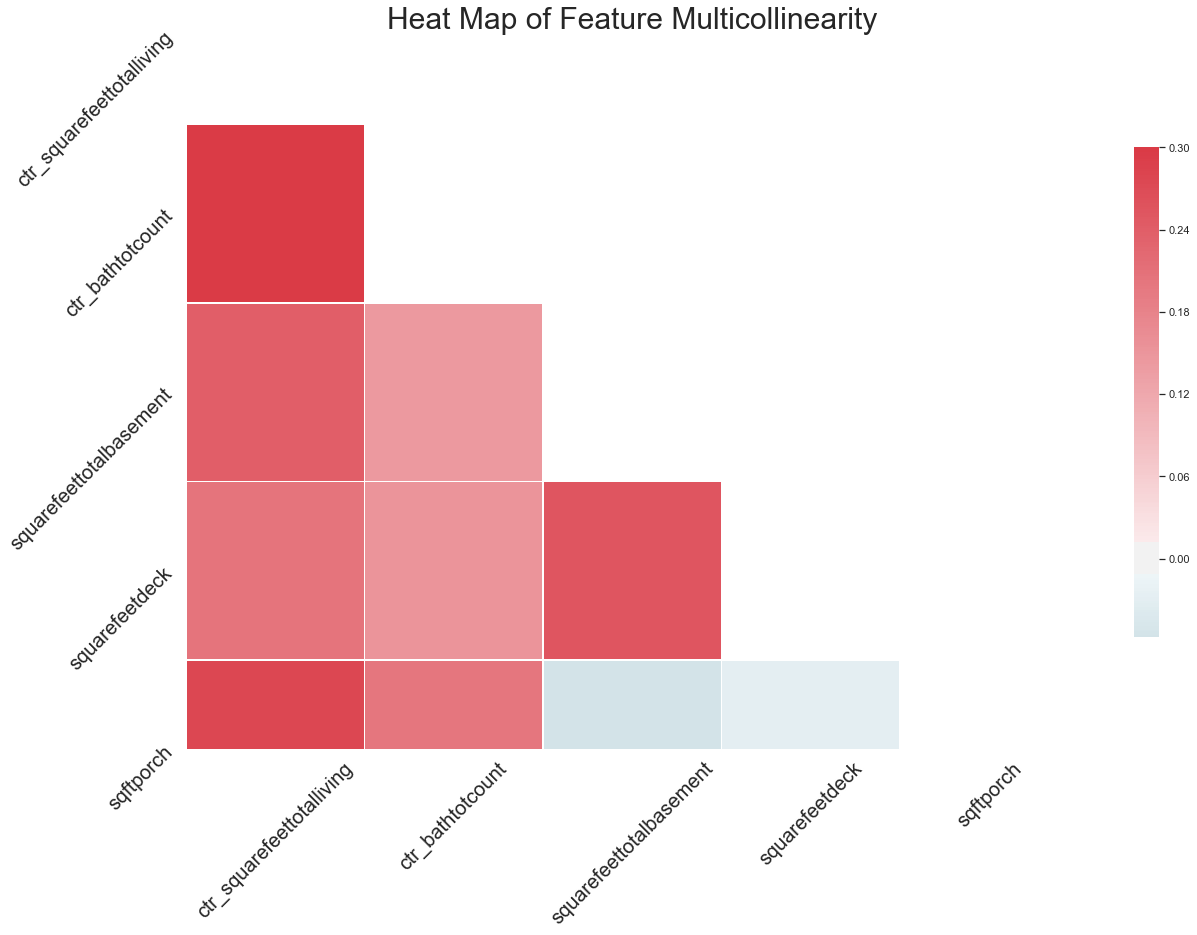

In [264]:
mask = np.triu(np.ones_like(x_corrs, dtype=np.bool))
f, ax = plt.subplots(figsize = (20, 18))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(x_corrs, mask = mask, cmap = cmap, vmax = 0.3, 
            center = 0, square = True, linewidths = 0.5, 
            cbar_kws = {'shrink': 0.5})
ax.tick_params(axis='both', which='major', labelsize=20, labelrotation = 45)
ax.set_title('Heat Map of Feature Multicollinearity', fontsize = 30)

#### Interpretation:

From this we see that the squarefootage features do have multicollinearity and so perhaps dropping one of the squarefoot features would be worth while.  Total square foot and bath count are highly correlated as well so perhaps we try dropping bath count:

# Model 11 Iteration

In this model we drop bath count from the model:

In [204]:
to_drop_from = features8.copy()

In [205]:
to_drop_from.remove('bathtotcount')

In [206]:
features11 = to_drop_from

In [207]:
features11

['saleprice',
 'squarefeettotalliving',
 'squarefeetdeck',
 'sqftporch',
 'wtfnt_2',
 'wtfnt_3',
 'wtfnt_4']

In [208]:
model(features11, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1746.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:32:03   Log-Likelihood:            -2.5454e+05
No. Observations:               18170   AIC:                         5.091e+05
Df Residuals:                   18163   BIC:                         5.092e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.744e+

Hardly budgest r^2.  Try dropping sqft of porch?

In [218]:
to_drop_from1 = features8.copy()

In [219]:
to_drop_from1.remove('sqftporch')

In [220]:
features11_1 = to_drop_from1

In [221]:
features11_1

['saleprice',
 'squarefeettotalliving',
 'bathtotcount',
 'squarefeetdeck',
 'wtfnt_2',
 'wtfnt_3',
 'wtfnt_4']

In [222]:
model(features11_1, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     1735.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:34:02   Log-Likelihood:            -2.5456e+05
No. Observations:               18170   AIC:                         5.091e+05
Df Residuals:                   18163   BIC:                         5.092e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.552e+

Got lower, so let's not do that.

In [223]:
df.columns

Index(['documentdate', 'saleprice', 'propertytype', 'principaluse',
       'saleinstrument', 'currentuseland', 'historicproperty', 'salereason',
       'propertyclass', 'zipcode', 'streettype', 'stories', 'buildinggrade',
       'squarefeettotalliving', 'squarefeettotalbasement',
       'squarefeetgarageattached', 'squarefeetopenporch',
       'squarefeetenclosedporch', 'squarefeetdeck', 'bedrooms',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount',
       'fireplacesinglestory', 'fireplacemultiplestory',
       'fireplacefreestanding', 'fireplaceadditional', 'yearbuilt',
       'yearrenovated', 'percentcomplete', 'obsolescence',
       'percentnetcondition', 'condition', 'township', 'propertytype.1',
       'districtname', 'levycode', 'lotsquarefootage', 'watersystem', 'access',
       'topography', 'viewmtranier', 'viewolympics', 'viewcascades',
       'viewterritorial', 'viewseattleskyline', 'viewpugetsound',
       'viewlakewashington', 'viewlakesammamish', 'viewsmalllakeriv

# Investigate other features:

In [226]:
df['viewlakewashington'].unique()

array([0, 1, 4, 3, 2])

In [227]:
# look up view codes:
codes[codes['LUType'] == 58]

,LUType,LUItem,LUDescription
997,58,1,FAIR ...
998,58,2,AVERAGE ...
999,58,3,GOOD ...
1000,58,4,EXCELLENT ...


In [234]:
df['saleprice'].mean()

733626.5002751788

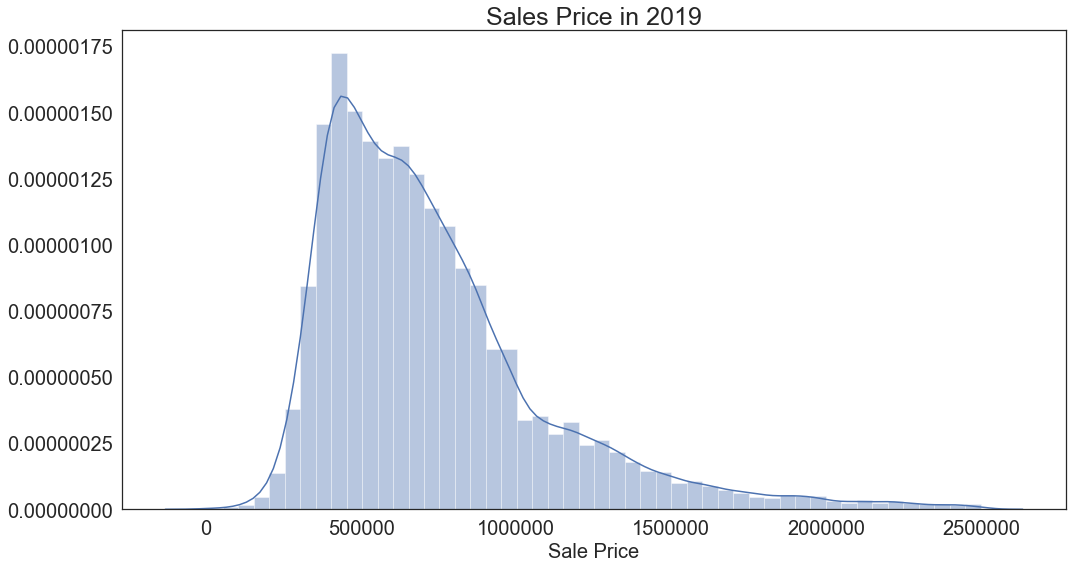

In [247]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Sales Price in 2019', fontsize = 25)
sns.distplot(df.saleprice, ax = ax, axlabel = "")
# ax[1].set_title('Boxplot of 2019 Sales Price Data', fontsize = 20)
# sns.boxplot(df.saleprice, ax= ax[1])
ax.tick_params(axis='both', labelsize=20)
# ax[1].tick_params(axis='both', labelsize=12)
plt.xlabel('Sale Price', fontsize = 20)
plt.tight_layout()

In [248]:
df['saleprice'].min()

5000.0

In [249]:
df['saleprice'].max()

2498000.0

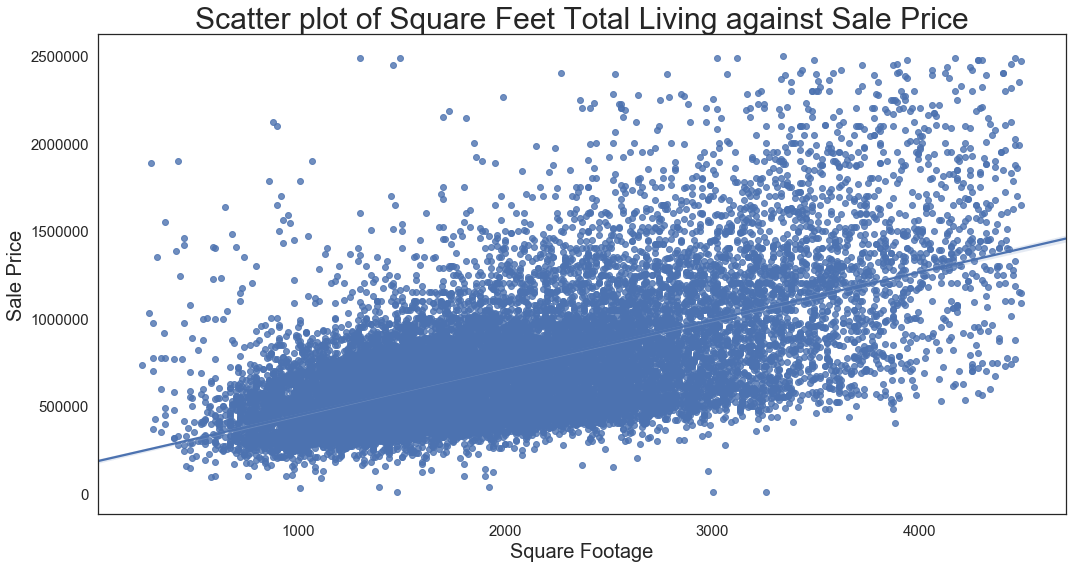

In [272]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'squarefeettotalliving', y = 'saleprice', data = df);
ax.set_title('Scatter plot of Square Feet Total Living against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'squarefeettotalliving', y = 'saleprice', data = df);
ax.set_title('Scatter plot of Square Feet Total Living against Sale Price', fontsize = 20)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Square Footage', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.tight_layout()

In [265]:
model(['saleprice', 'squarefeettotalliving'], df, 'saleprice')

Rsquared of Model: 0.35601206530916996
----------
Beta values of Model:
Intercept                174361.586896
squarefeettotalliving       272.484748
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:39:09   Log-Likelihood:            -2.5468e+05
No. Observations:               18170   AIC:                         5.094e+05
Df Residuals:                   18168   BIC:                         5.094e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err  

In [273]:
features12 = ['saleprice', 'squarefeettotalliving', 'bathtotcount', 'squarefeetdeck', 'sqftporch', 'squarefeettotalbasement']

In [275]:
model12 = model(features12, df, 'saleprice')

Rsquared of Model: 0.37152546795830665
----------
Beta values of Model:
Intercept                  150070.591254
squarefeettotalliving         233.364070
bathtotcount                23893.748146
squarefeetdeck                130.587331
sqftporch                     154.131522
squarefeettotalbasement        54.189358
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     2148.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:50:08   Log-Likelihood:            -2.5446e+05
No. Observations:               18170   AIC:                         5.089e+05
Df Residuals:                   18164   BIC:                         5.090e+05
Df Model:                          

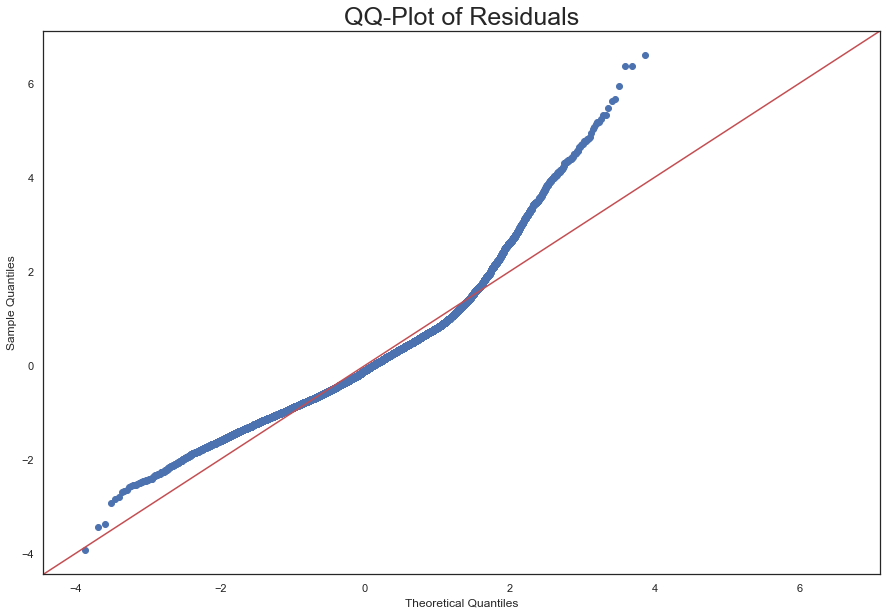

In [276]:
normality_assumption(model12)

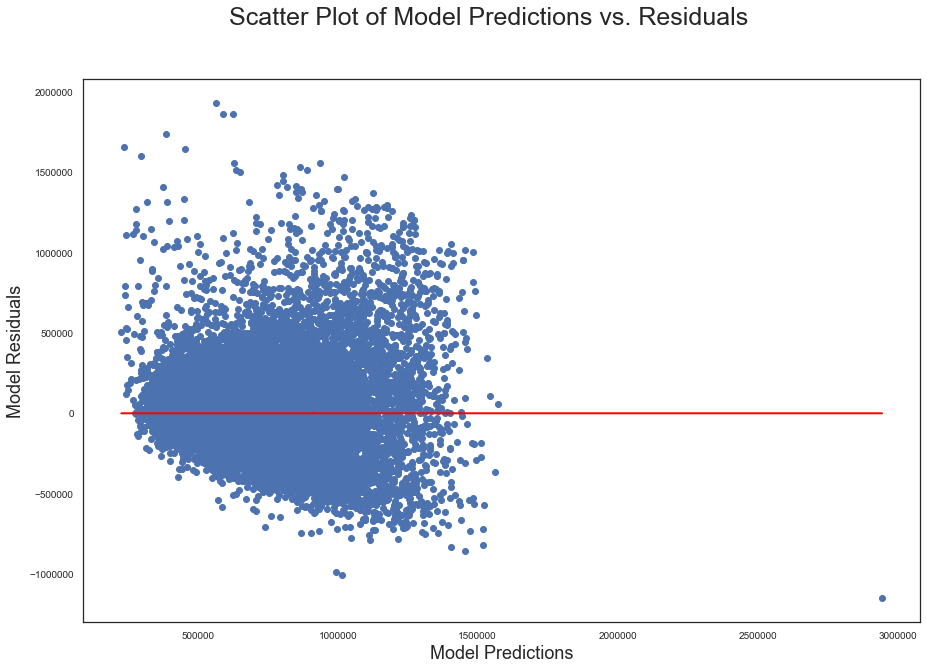

In [277]:
homo_assumption(model12)